In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [3]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [5]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile, fetch_header
from   poisson     import fillfactor_expectation
from   ddp_zlimits import ddp_zlimits
from   params      import fillfactor_threshold
from   volfracs    import eval_volavg_fillfactor
from astropy.table import Table

In [6]:
survey    = 'gama'
version   = 'GAMA4'
dryrun    = False

In [7]:
fpath     = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
gama_ddp  = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,BOUND_DIST,rRANDSEP,rRANDMATCH,rBOUND_DIST,rFILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
396734,587728307494518962,174.84419209,1.48874532,17.966036,0.07693,4,G12_Y6_070_278,6,19.599045,18.460993,18.011465,17.70217,17.538162,0.07693,244.71365380355658,36.94329100748867,G12,2,0,-226.23686238725756,20.41323854637012,5.903636578593534,226.09535829089174,-21.990256874450022,5.655855155770772,0.44952774,17.966036,0.4729940941645066,0,3,-0.1151587621869615,-0.1386251158729516,0.07951795058315417,0.08163672737301295,0.44740896368865685,2.12,-0.0746221,-0.1630916,-18.982151013094537,-18.89368151523506,-19.056773115176313,36.948186855990045,37.02280895807182,36.85971735813057,-0.12265288734182865,-0.1501001866282345,0.09407199102037246,0.11507510308542879,-18.996705053531755,1.8339634,0.1821704610480332,0.0,-5.966036,0.005020578049767177,0.0,2669290.291940297,0 .. 1,1 .. 1,27421.0,0.5327375584356406,2.0822930476205306,0.6345513523937538,22200,2.2150155627219412,0.5325823253569792,0.6032578938782078,36,59,111,-99.0,-99
7540,588848900985585714,178.15000531,0.80061334,19.188776,0.16999,4,G12_Y2_027_071,6,22.206972,20.20373,19.118795,18.613808,18.303358,0.16999,576.4199271202287,38.80369493087599,G12,0,0,-492.36592271390106,15.903283374563546,6.884031830454092,492.2503106955373,-19.336088042891557,6.3445634672762425,1.0849342,19.188776,0.8975355553583038,0,6,-0.015390273440241062,0.1720084058205959,0.2117165871070718,0.5455261201227054,0.751124701603507,0.8,-0.1648903,-0.135992,-19.66174519753991,-19.6906434962803,-19.826635501747713,38.85052121377526,39.01541151798306,38.879419512515646,-0.06012978248397845,0.06407142197584106,0.15659509587822268,0.32924671168950437,-19.606623706311062,0.6112232,0.2165533294651863,0.0,-7.188776,0.0072148329586020615,0.0,4386558.181751358,0 .. 0,1 .. 0,51397.0,1.0,10.321935178983036,0.9299974205998153,1066058,10.09785810981401,1.0,0.6575383430961741,9,18,0,-0.3121587579559484,3
130880,587724649793519865,179.04631112,-2.14729148,18.697596,0.25873,4,G12_Y5_002_305,6,22.107285,19.966759,18.579489,17.988745,17.559137,0.25873,926.1056104884753,39.83330257615837,G12,0,0,-735.1275935320934,12.237337042573014,-27.567326745059457,734.9937398168469,-17.362970346569142,-28.37284590658471,1.38727,18.697596,0.9250766384842138,0,6,0.11050511956583978,0.5726984548365086,0.33711205262554944,0.9562303674711494,0.7681516589092828,0.8,-0.2509681,-0.206984,-21.221850933829998,-21.265835034052586,-21.47281903247044,39.919446530143475,40.17041462878392,39.96343063036606,-0.01470382409501983,0.31050231758403035,0.20202105426718128,0.5756776072976937,-21.08675993547163,1.10

In [8]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
396734,587728307494518962,174.84419209,1.48874532,17.966036,0.07693,4,G12_Y6_070_278,6,19.599045,18.460993,18.011465,17.70217,17.538162,0.07693,244.71365380355658,36.94329100748867,G12,0,0,-226.23686238725756,20.41323854637012,5.903636578593534,226.09535829089174,-21.990256874450022,5.655855155770772,0.44952774,17.966036,0.4729940941645066,0,3,-0.1151587621869615,-0.1386251158729516,0.07951795058315417,0.08163672737301295,0.44740896368865685,2.12,-0.0746221,-0.1630916,-18.982151013094537,-18.89368151523506,-19.056773115176313,36.948186855990045,37.02280895807182,36.85971735813057,-0.12265288734182865,-0.1501001866282345,0.09407199102037246,0.11507510308542879,-18.996705053531755,1.8339634,0.1821704610480332,0.0,-5.966036,0.005020578049767177,0.0,2669290.291940297
7540,588848900985585714,178.15000531,0.80061334,19.188776,0.16999,4,G12_Y2_027_071,6,22.206972,20.20373,19.118795,18.613808,18.303358,0.16999,576.4199271202287,38.80369493087599,G12,0,0,-492.36592271390106,15.903283374563546,6.884031830454092,492.2503106955373,-19.336088042891557,6.3445634672762425,1.0849342,19.188776,0.8975355553583038,0,6,-0.015390273440241062,0.1720084058205959,0.2117165871070718,0.5455261201227054,0.751124701603507,0.8,-0.1648903,-0.135992,-19.66174519753991,-19.6906434962803,-19.826635501747713,38.85052121377526,39.01541151798306,38.879419512515646,-0.06012978248397845,0.06407142197584106,0.15659509587822268,0.32924671168950437,-19.606623706311062,0.6112232,0.2165533294651863,0.0,-7.188776,0.0072148329586020615,0.0,4386558.181751358
130880,587724649793519865,179.04631112,-2.14729148,18.697596,0.25873,4,G12_Y5_002_305,6,22.107285,19.966759,18.579489,17.988745,17.559137,0.25873,926.1056104884753,39.83330257615837,G12,0,0,-735.1275935320934,12.237337042573014,-27.567326745059457,734.9937398168469,-17.362970346569142,-28.37284590658471,1.38727,18.697596,0.9250766384842138,0,6,0.11050511956583978,0.5726984548365086,0.33711205262554944,0.9562303674711494,0.7681516589092828,0.8,-0.2509681,-0.206984,-21.221850933829998,-21.265835034052586,-21.47281903247044,39.919446530143475,40.17041462878392,39.96343063036606,-0.01470382409501983,0.31050231758403035,0.20202105426718128,0.5756776072976937,-21.08675993547163,1.1024036,0.38031251502092683,0.0,-6.6975956,0.014797157145083391,0.0,21305518.942171358
583445,588848899910402309,174.75842078,-0.06996696,18.395084,0.17479,4,G12_Y1_AN1_093,6,21.108936,19.595013,18.458279,17.959124,17.554619,0.17479,594.529113988285,38.87086563400707,G12,0,0,-503.956074051427,46.23236702542035,-0.6179924094322197,503.6204717380619,-49.745250705515936,-1.1699261925989761,1.136734,18.395084,0.9266723868993302,0,6,-0.005230701692055584,0.20483092019767657,0.22134726524121778,0.5889430620500551,0.7691382119802253,0.8,-0.1695463,-0.139832,-20.5275822120115,-20.557296513240

In [9]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

MCOLOR_0P0,IN_D8LUMFN,ZSURV,FILLFACTOR_VMAX,FILLFACTOR,ZMAX,RA,MALL_0P0,FIELD,ZMIN,DEC,VZ,VMAX
mag,,,,,,deg,mag,,,deg,,
float64,int64,float32,float64,float64,float64,float64,float64,bytes3,float64,float64,float64,float64
-19.6906434962803,0,0.16999,0.6556138051434419,1.0,0.2165533294651863,178.15000531,-19.66174519753991,G12,0.01882999949157238,0.80061334,1430795.764846583,2873876.146537764
-21.265835034052586,0,0.25873,0.7053946250030656,1.0,0.2715100049972534,179.04631112,-21.221850933829998,G12,0.01882999949157238,-2.14729148,5132487.176095755,5881941.043143316
-20.557296513240022,0,0.17479,0.7053946250030656,0.9795835466935354,0.2715100049972534,174.75842078,-20.5275822120115,G12,0.01882999949157238,-0.06996696,1668706.5454436005,5881941.043143316
-20.504150349202067,0,0.25215,0.7053946250030656,1.0,0.2715100049972534,133.74348864,-20.46128484934798,G9,0.01882999949157238,1.11387765,4771125.025529307,5881941.043143316
-18.904027951592326,0,0.13581,0.6046093612644038,1.0,0.1837258667676475,137.9906742,-19.060209436053157,G9,0.01882999949157238,-0.64552131,686393.0957389111,1652014.2220711953
-20.01818458212423,0,0.21021,0.7053946250030656,1.0,0.2715100049972534,214.01399238,-20.259926030765055,G15,0.01882999949157238,2.1549824,2839607.7344685276,5881941.043143316
-20.041587721618836,0,0.1119,0.6900271387080157,1.0,0.2451877249836676,182.29698423,-20.022564712974255,G12,0.01882999949157238,-1.01326175,443676.38247500954,4310530.349351683
-19.761884153122704,0,0.25753,0.7139662103176905,0.9954562933199137,0.2690094207639041,179.45447947,-20.058043629164498,G12,0.01882999949157238,-2.38727666,5126908.873060929,5799922.588708463


In [10]:
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

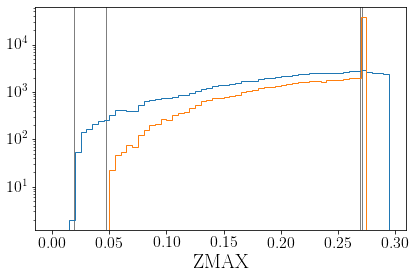

In [11]:
pl.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
pl.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

pl.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

_ = pl.hist( gama_ddp['ZMAX'], bins=np.arange(0.0, 0.3, 0.005), histtype='step')
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.005), histtype='step')

pl.xlabel('ZMAX')
pl.yscale('log')

In [12]:
ddp_zlimits

{'DDP1': [0.018824567924955588, 0.27151303002263294],
 'DDP2': [0.010920624935373494, 0.19364943378836194],
 'DDP3': [0.006922749951471983, 0.10152763865652228]}

Text(0, 0.5, '$z_{\\rm max}$')

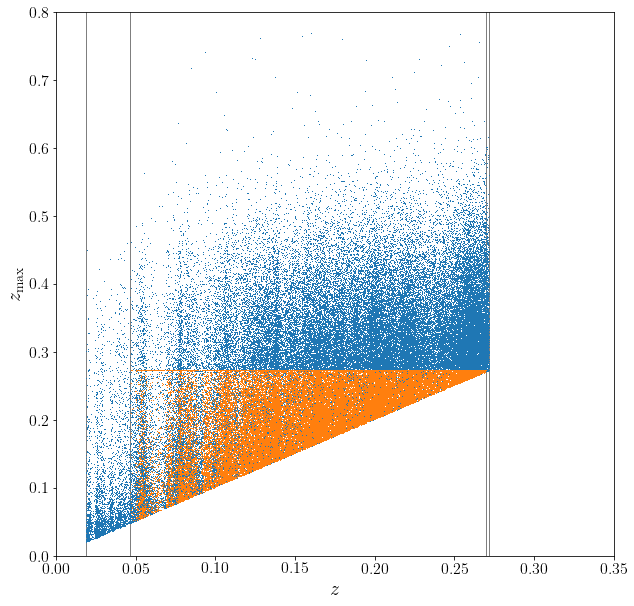

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.80)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

Text(0, 0.5, '$z_{\\rm min}$')

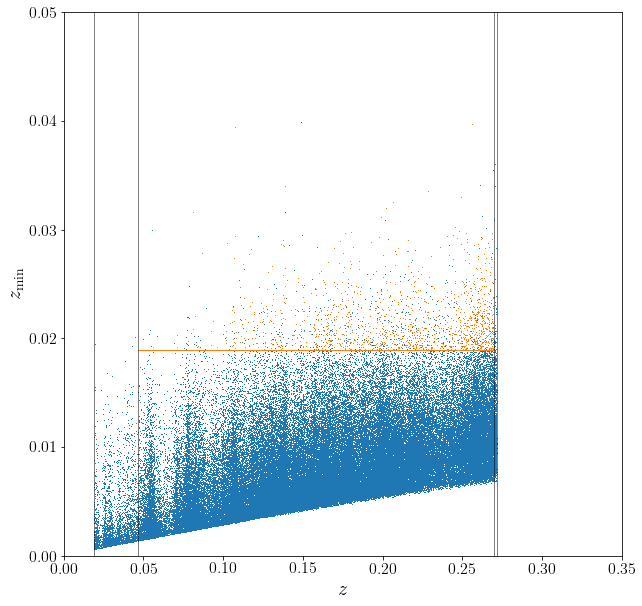

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMIN'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMIN'], marker=',', lw=0.0)

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.05)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm min}$')

In [15]:
ddp1_full8frac = fetch_header(fpath='/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_GALL_0.fits', name='DDP1_FULL8FRAC')

Text(0.5, 1.0, 'Fillfactor $\\geq$ 0.90')

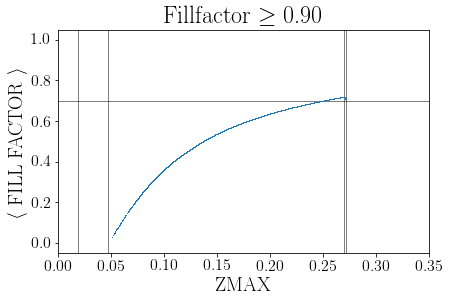

In [16]:
pl.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
pl.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

pl.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

pl.axhline(ddp1_full8frac,   c='k', lw=0.5)

pl.plot(gama_vmax['ZMAX'], gama_vmax['FILLFACTOR_VMAX'], marker=',', lw=0.0)

pl.xlim(0.0, 0.35)
pl.ylim(-0.05, 1.05)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

pl.title(r'Fillfactor $\geq$ {:.2f}'.format(fillfactor_threshold))

(0.2, 1.03)

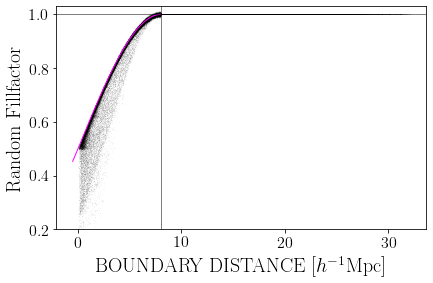

In [18]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.03)

(0.2, 1.03)

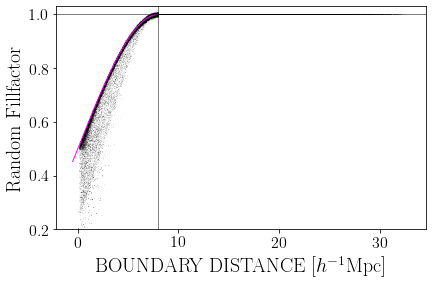

In [19]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['rBOUND_DIST'], gama_ddp['rFILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.03)

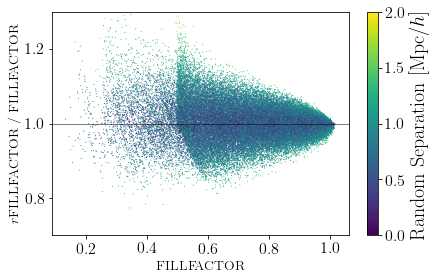

In [20]:
pl.axhline(1.0, c='k', lw=0.5)
pl.scatter(gama_ddp['FILLFACTOR'], gama_ddp['rFILLFACTOR'] / gama_ddp['FILLFACTOR'], lw=0.0, marker='.', s=4, c=gama_ddp['rRANDSEP'], vmin=0., vmax=2.)

pl.ylim(0.7, 1.3)

pl.xlabel('FILLFACTOR', fontsize=14)
pl.ylabel(r'$r$FILLFACTOR / FILLFACTOR', fontsize=14)

pl.colorbar(label='Random Separation [Mpc/$h$]')

Text(0, 0.5, '$r$BOUND_DIST')

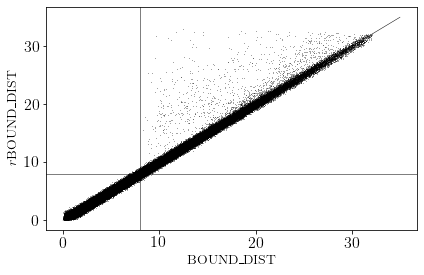

In [21]:
us = np.logspace(-2., np.log10(35.), 20)

pl.axvline(8.0, c='k', lw=0.5)
pl.axhline(8.0, c='k', lw=0.5)

pl.plot(us, us, c='k', lw=0.5)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['rBOUND_DIST'], lw=0.0, marker='.', s=1, c='k', vmin=0., vmax=.6)

pl.xlabel('BOUND_DIST', fontsize=14)
pl.ylabel(r'$r$BOUND_DIST', fontsize=14)

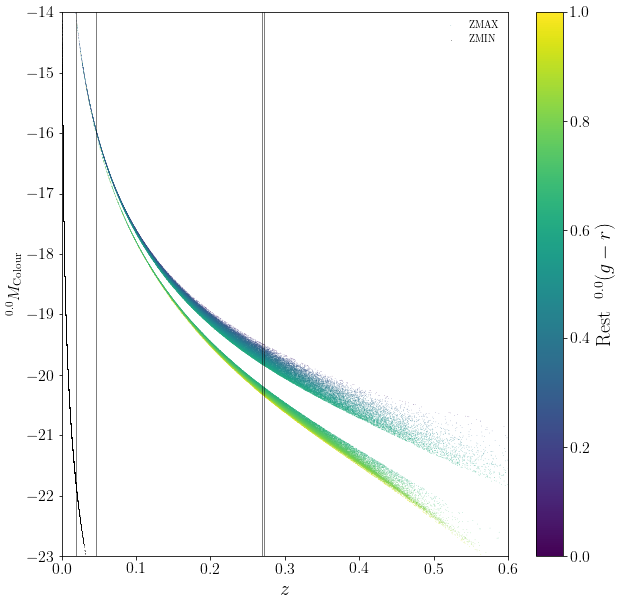

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

sc      = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0, label='ZMAX')
sc      = ax.scatter(gama_zmax['ZMIN'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c='k', vmin=0.0, vmax=1.0, label='ZMIN')

ax.set_xlim(0.0,   0.6)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

ax.legend(frameon=False)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

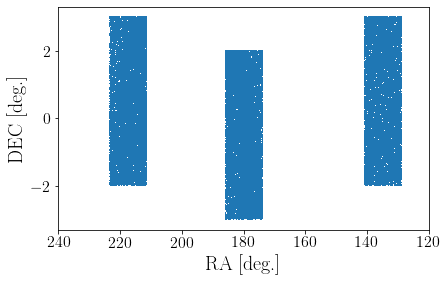

In [25]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [26]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.9,-22.9,-22.9,-22.9,0.0,0.0,0.0,0.0,0.0,0.0
-22.831925312129783,-22.864672608757225,-22.7,-22.864682184297706,4.91349269247146e-06,1.7371820010785586e-06,6.848633004974947e-06,2.4213574455130194e-06,8.0,0.7174947235627481
-22.704044909575536,-22.69803884734222,-22.5,-22.698044339625408,3.193770250106449e-05,4.428962461080866e-06,4.450162559544417e-05,6.171265141827296e-06,52.0,0.717672352199408
-22.46463274592758,-22.481083738461145,-22.299999999999997,-22.481088482250815,5.589097937686286e-05,5.8589666190302775e-06,7.785198598263439e-05,8.161105667388297e-06,91.0,0.7179316171089624
-22.285094947604357,-22.290651532969026,-22.099999999999998,-22.29065505666599,0.00011485289168652037,8.398875252161253e-06,0.00015994620567208912,1.1696424976557623e-05,187.0,0.7180783522643194
-22.096814637488745,-22.096086917259054,-21.9,-22.09608959454204,0.0002266348504402461,1.1798139056104947e-05,0.0003155604918285646,1.642742305487094e-05,369.0,0.7181993379506572
-21.885638324898856,-21.890440237315442,-21.7,-21.89044221873559,0.0003986070946767472,1.564669712296127e-05,0.0005549315144009405,2.1782967365613184e-05,649.0,0.7183027955262968
-21.68767578779024,-21.691121328191194,-21.5,-21.69112133240641,0.0006448959158868792,1.9901920039643376e-05,0.0008977614247817831,2.7705519062118137e-05,1050.0,0.7183377725396491
-21.490116210238114,-21.493112284852565,-21.299999999999997,-21.493112284852575,0.0010564009288813638,2.5472088264359688e-05,0.0014706186549908245,3.545976452596155e-05,1720.0,0.7183377725396491


Text(0.5, 0, '$V/V_{Max}$')

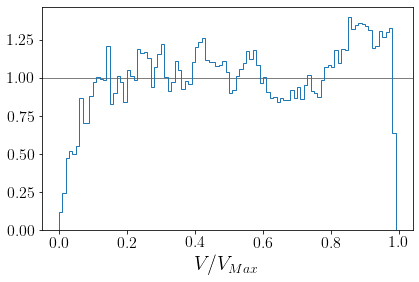

In [24]:
ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

p.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

pl.axhline(1., c='k', lw=0.5)

_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

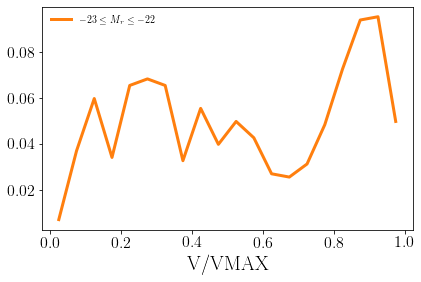

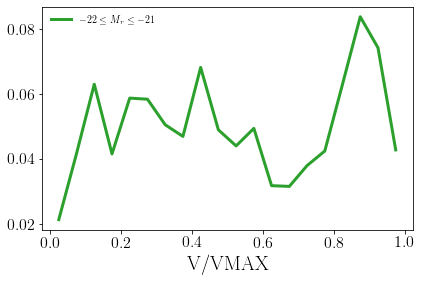

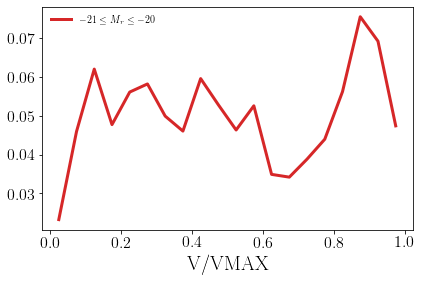

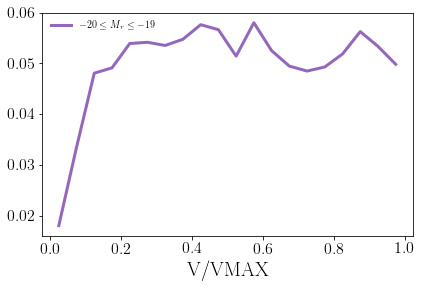

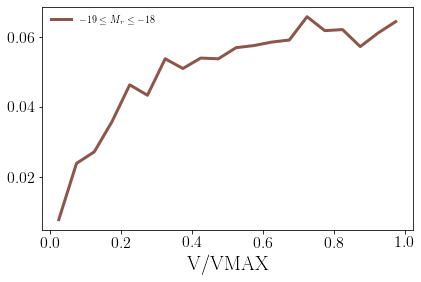

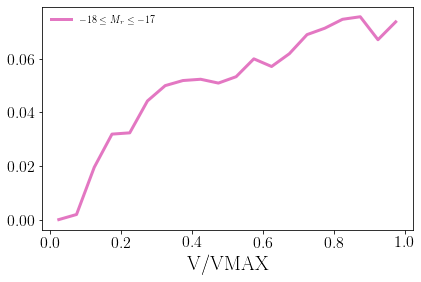

In [25]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [26]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


In [27]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--


In [28]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.